# install graphviz

In [ ]:
# conda install graphviz
# conda install -c conda-forge python-graphviz

# import library

In [ ]:
import numpy as np
import os
import seaborn as sns
import pandas as pd
np.random.seed(42)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# drop NaN

In [ ]:
titanic = sns.load_dataset('titanic')

In [ ]:
titanic

In [ ]:
titanic.dropna(axis = 0)

In [ ]:
titanic.dropna(axis = 1)

# Load iris data

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
# iris = load_iris(as_frame=False)

In [ ]:
iris.data

In [ ]:
iris.feature_names
# iris.data.columns

In [ ]:
df = iris.data
df

In [ ]:
iris.target
# iris.target.unique()
# iris.target.value_counts()
# iris.target_names

In [ ]:
df['label'] = iris.target
df

In [ ]:
df.describe()

# Visualization data

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['petal length (cm)'], y=df["petal width (cm)"])
# sns.scatterplot(x=df['petal length (cm)'], y=df["petal width (cm)"], hue= df["label"])
# sns.scatterplot(data=df, x='petal length (cm)', y="petal width (cm)", hue = "label")

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='sepal length (cm)', y="sepal width (cm)", hue= "label")

# Train DecisionTree Classifier

Scikit-learn URL :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
df = iris.data
df['label'] = iris.target

from sklearn.tree import DecisionTreeClassifier

X = df[['petal length (cm)',"petal width (cm)"]] # petal length and width
y = df['label']
# X = iris.data.iloc[:, 2:] # petal length and width

In [ ]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)
model.fit(X, y)

In [ ]:
model.predict_proba(X) #label = 0, 1, 2
# model.predict_proba([[5, 2]])

In [ ]:
model.predict([[5, 2]])

In [ ]:
model.feature_importances_

# Visualization Decision Tree

In [ ]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [ ]:
from sklearn.tree import export_graphviz
from graphviz import Source

export_graphviz(
        model,
        out_file=os.path.join(IMAGES_PATH, "iris_decision_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )
graph = Source.from_file(os.path.join(IMAGES_PATH, "iris_decision_tree.dot"))
graph
# graph.render(filename='iris_decision_tree', directory=IMAGES_PATH, format='png')

# visualization decision boundary

In [ ]:
axes=[0, 7.5, 0, 3]
x1s = np.linspace(axes[0], axes[1], 100)
x2s = np.linspace(axes[2], axes[3], 100)

In [ ]:
x2s

In [ ]:
x1, x2 = np.meshgrid(x1s, x2s)

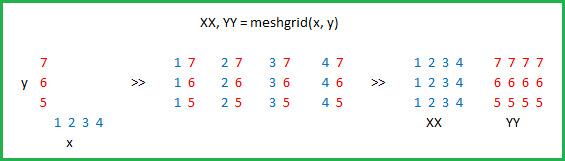

In [ ]:
x1.shape

In [ ]:
X_new = np.c_[x1.ravel(), x2.ravel()] 
X_new.shape

In [ ]:
y_pred = model.predict(X_new)

In [ ]:
y_pred.shape

In [ ]:
y_pred = y_pred.reshape(x1.shape)

In [ ]:
x1.shape, x2.shape, y_pred.shape

In [ ]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df, x='petal length (cm)', y="petal width (cm)", hue= "label")

In [ ]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df, x='petal length (cm)', y="petal width (cm)", hue= "label")
plt.contourf(x1, x2, y_pred, alpha=0.3)

In [ ]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df, x='petal length (cm)', y="petal width (cm)", hue= "label")
plt.contourf(x1, x2, y_pred, alpha=0.3)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.4, 1.0, "Depth=0", fontsize=13)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)

# patal length = 2.45
#patal width = 1.75

# is it only one DT?

In [ ]:
model2 = DecisionTreeClassifier(max_depth=2, random_state=40)
model2.fit(X, y)

In [ ]:
export_graphviz(
        model2,
        out_file=os.path.join(IMAGES_PATH, "iris_model2_decision_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join(IMAGES_PATH, "iris_model2_decision_tree.dot"))

In [ ]:
plt.figure(figsize=(16, 8))
axes=[0, 7.5, 0, 3]
x1s = np.linspace(axes[0], axes[1], 100)
x2s = np.linspace(axes[2], axes[3], 100)

x1, x2 = np.meshgrid(x1s, x2s)
X_new = np.c_[x1.ravel(), x2.ravel()]

y_pred = model2.predict(X_new).reshape(x1.shape)

sns.scatterplot(data=df, x='petal length (cm)', y="petal width (cm)", hue= "label")
plt.contourf(x1, x2, y_pred, alpha=0.3)

plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=15)

In [ ]:
model_overfit = DecisionTreeClassifier(max_depth=10, random_state=40)
model_overfit.fit(X, y)

In [ ]:
export_graphviz(
        model_overfit,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

In [ ]:
plt.figure(figsize=(16, 8))
axes=[0, 7.5, 0, 3]
x1s = np.linspace(axes[0], axes[1], 100)
x2s = np.linspace(axes[2], axes[3], 100)

x1, x2 = np.meshgrid(x1s, x2s)
X_new = np.c_[x1.ravel(), x2.ravel()]

y_pred = model_overfit.predict(X_new).reshape(x1.shape)

sns.scatterplot(data=df, x='petal length (cm)', y="petal width (cm)", hue= "label")
plt.contourf(x1, x2, y_pred, alpha=0.3)

# split dataset(train and test)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 11)

In [ ]:
model = DecisionTreeClassifier(max_depth= 2,random_state=42)
model.fit(X_train,y_train)

In [ ]:
pred_train = model.predict(X_train)
accuracy_score(pred_train, y_train)

In [ ]:
pred_test = model.predict(X_test)
print(f"정확도: {accuracy_score(pred_test, y_test)}")

In [ ]:
export_graphviz(
        model,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names,
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

In [ ]:
model.feature_importances_

In [ ]:
iris.feature_names

In [ ]:
sns.barplot(x = iris.feature_names, y = model.feature_importances_)
plt.xticks(rotation = 90)